PRELIMINARY STEP: import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the dataset thanks to the built-in function in pandas.

In [2]:
ds = pd.read_csv("./credit_prediction.csv") #open and read the file using pandas

In [3]:
ds.head(10) #show the first 10 elements

,id,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,26.822620,265.0,No,80.415295,NaN,312.494089,Good
1,1,23.0,Scientist,NaN,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,NaN,266.0,No,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,28.609352,267.0,No,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,3,23.0,Scientist,19114.12,1824.843333,NaN,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,Good,809.98,31.377862,268.0,No,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,4,23.0,NaN,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,24.797347,269.0,No,41.420153,High_spent_Medium_value_payments,341.489231,Good
5,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,27.262259,270.0,No,62.430172,High_spent_Medium_value_payments,340.479212,Good
6,6,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,NaN,271.0,No,178.344067,Low_spent_Small_value_payments,244.565317,Good
7,7,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,4.0,Good,809.98,23.933795,NaN,No,24.785217,High_spent_Medium_value_payments,358.124168,Standard
8,8,28.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,NaN,Credit-Builder Loan,...,2.0,Good,605.03,NaN,319.0,NaN,NaN,Low_spent_Small_value_payments,470.690627,Standard
9,9,28.0,Teacher,34847.84,3037.986667,NaN,4.0,6.0,1.0,Credit-Builder Loan,...,2.0,Good,605.03,38.550848,320.0,No,40.391238,High_spent_Large_value_payments,484.591214,Good


In [4]:
ds.corr() #to see correlations, but all categorical ones will be ignored, so change them

,id,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
id,1.000000,0.004053,-0.005780,-0.003586,0.003776,-0.003119,0.003751,-0.007748,-0.005714,0.003155,0.008625,-0.002343,0.002999,-0.006853,-0.006203,0.004839,0.000779
Age,0.004053,1.000000,0.094214,0.092432,-0.192405,-0.147670,-0.218744,-0.215283,-0.175110,-0.186063,-0.158929,-0.251603,-0.202975,0.023721,0.235896,0.006597,-0.002635
Annual_Income,-0.005780,0.094214,1.000000,0.998155,-0.285732,-0.218083,-0.302391,-0.256766,-0.249761,-0.287701,-0.177471,-0.280632,-0.269997,0.177065,0.272721,0.055108,-0.004711
Monthly_Inhand_Salary,-0.003586,0.092432,0.998155,1.000000,-0.283303,-0.216476,-0.301315,-0.256375,-0.249382,-0.285382,-0.175202,-0.279105,-0.269707,0.178518,0.271030,0.053704,-0.004176
Num_Bank_Accounts,0.003776,-0.192405,-0.285732,-0.283303,1.000000,0.442678,0.583227,0.472694,0.560583,0.601553,0.333300,0.515379,0.506999,-0.070942,-0.485478,-0.015364,0.005845
Num_Credit_Card,-0.003119,-0.147670,-0.218083,-0.216476,0.442678,1.000000,0.499178,0.417508,0.479751,0.424036,0.253572,0.458086,0.491157,-0.055238,-0.416870,-0.010274,0.004964
Interest_Rate,0.003751,-0.218744,-0.302391,-0.301315,0.583227,0.499178,1.000000,0.560036,0.591529,0.571366,0.370325,0.631691,0.628982,-0.077353,-0.576643,-0.018500,0.004477
Num_of_Loan,-0.007748,-0.215283,-0.256766,-0.256375,0.472694,0.417508,0.560036,1.000000,0.503398,0.473959,0.374885,0.564533,0.639486,-0.101013,-0.606878,-0.012386,0.001958
Delay_from_due_date,-0.005714,-0.175110,-0.249761,-0.249382,0.560583,0.479751,0.591529,0.503398,1.000000,0.540332,0.296495,0.539325,0.572768,-0.064390,-0.489846,-0.009811,0.004988
Num_of_Delayed_Payment,0.003155,-0.186063,-0.287701,-0.285382,0.601553,0.424036,0.571366,0.473959,0.540332,1.000000,0.328173,0.499689,0.503561,-0.072964,-0.481637,-0.021178,0.007799


In [6]:
from sklearn.preprocessing import LabelEncoder
ds['Credit_Mix'] = LabelEncoder().fit_transform(ds['Credit_Mix'])
ds['Payment_Behaviour'] = LabelEncoder().fit_transform(ds['Payment_Behaviour'])

ds.head()
#again
ds.corr()

,id,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
id,1.000000,0.004053,-0.005780,-0.003586,0.003776,-0.003119,0.003751,-0.007748,-0.005714,0.003155,0.008625,-0.002343,0.010011,0.002999,-0.006853,-0.006203,0.004839,-0.005163,0.000779
Age,0.004053,1.000000,0.094214,0.092432,-0.192405,-0.147670,-0.218744,-0.215283,-0.175110,-0.186063,-0.158929,-0.251603,0.060897,-0.202975,0.023721,0.235896,0.006597,-0.030798,-0.002635
Annual_Income,-0.005780,0.094214,1.000000,0.998155,-0.285732,-0.218083,-0.302391,-0.256766,-0.249761,-0.287701,-0.177471,-0.280632,0.078006,-0.269997,0.177065,0.272721,0.055108,-0.265724,-0.004711
Monthly_Inhand_Salary,-0.003586,0.092432,0.998155,1.000000,-0.283303,-0.216476,-0.301315,-0.256375,-0.249382,-0.285382,-0.175202,-0.279105,0.077388,-0.269707,0.178518,0.271030,0.053704,-0.266155,-0.004176
Num_Bank_Accounts,0.003776,-0.192405,-0.285732,-0.283303,1.000000,0.442678,0.583227,0.472694,0.560583,0.601553,0.333300,0.515379,-0.184559,0.506999,-0.070942,-0.485478,-0.015364,0.080292,0.005845
Num_Credit_Card,-0.003119,-0.147670,-0.218083,-0.216476,0.442678,1.000000,0.499178,0.417508,0.479751,0.424036,0.253572,0.458086,-0.263867,0.491157,-0.055238,-0.416870,-0.010274,0.063975,0.004964
Interest_Rate,0.003751,-0.218744,-0.302391,-0.301315,0.583227,0.499178,1.000000,0.560036,0.591529,0.571366,0.370325,0.631691,-0.259463,0.628982,-0.077353,-0.576643,-0.018500,0.090950,0.004477
Num_of_Loan,-0.007748,-0.215283,-0.256766,-0.256375,0.472694,0.417508,0.560036,1.000000,0.503398,0.473959,0.374885,0.564533,-0.351639,0.639486,-0.101013,-0.606878,-0.012386,0.077168,0.001958
Delay_from_due_date,-0.005714,-0.175110,-0.249761,-0.249382,0.560583,0.479751,0.591529,0.503398,1.000000,0.540332,0.296495,0.539325,-0.326715,0.572768,-0.064390,-0.489846,-0.009811,0.077015,0.004988
Num_of_Delayed_Payment,0.003155,-0.186063,-0.287701,-0.285382,0.601553,0.424036,0.571366,0.473959,0.540332,1.000000,0.328173,0.499689,-0.195698,0.503561,-0.072964,-0.481637,-0.021178,0.084444,0.007799


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  int64  
 1   Age                       90113 non-null   float64
 2   Occupation                89954 non-null   object 
 3   Annual_Income             89811 non-null   float64
 4   Monthly_Inhand_Salary     89881 non-null   float64
 5   Num_Bank_Accounts         89935 non-null   float64
 6   Num_Credit_Card           90131 non-null   float64
 7   Interest_Rate             89999 non-null   float64
 8   Num_of_Loan               90030 non-null   float64
 9   Type_of_Loan              89921 non-null   object 
 10  Delay_from_due_date       90053 non-null   float64
 11  Num_of_Delayed_Payment    89927 non-null   float64
 12  Changed_Credit_Limit      90077 non-null   float64
 13  Num_Credit_Inquiries      89971 non-null   fl

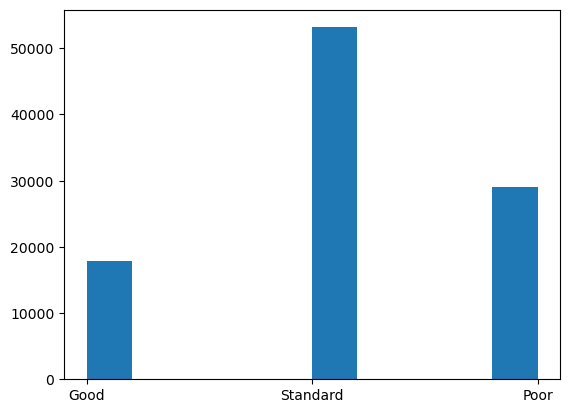

In [7]:
description = ds.describe() #statistical summary
ds.info() 

print(pd.value_counts(ds['Credit_Score']))
_ = plt.hist(ds['Credit_Score']) # Assign the result of plt.hist to variable _. This is a common trick to discard unwanted output.
plt.show()

KeyboardInterrupt: 

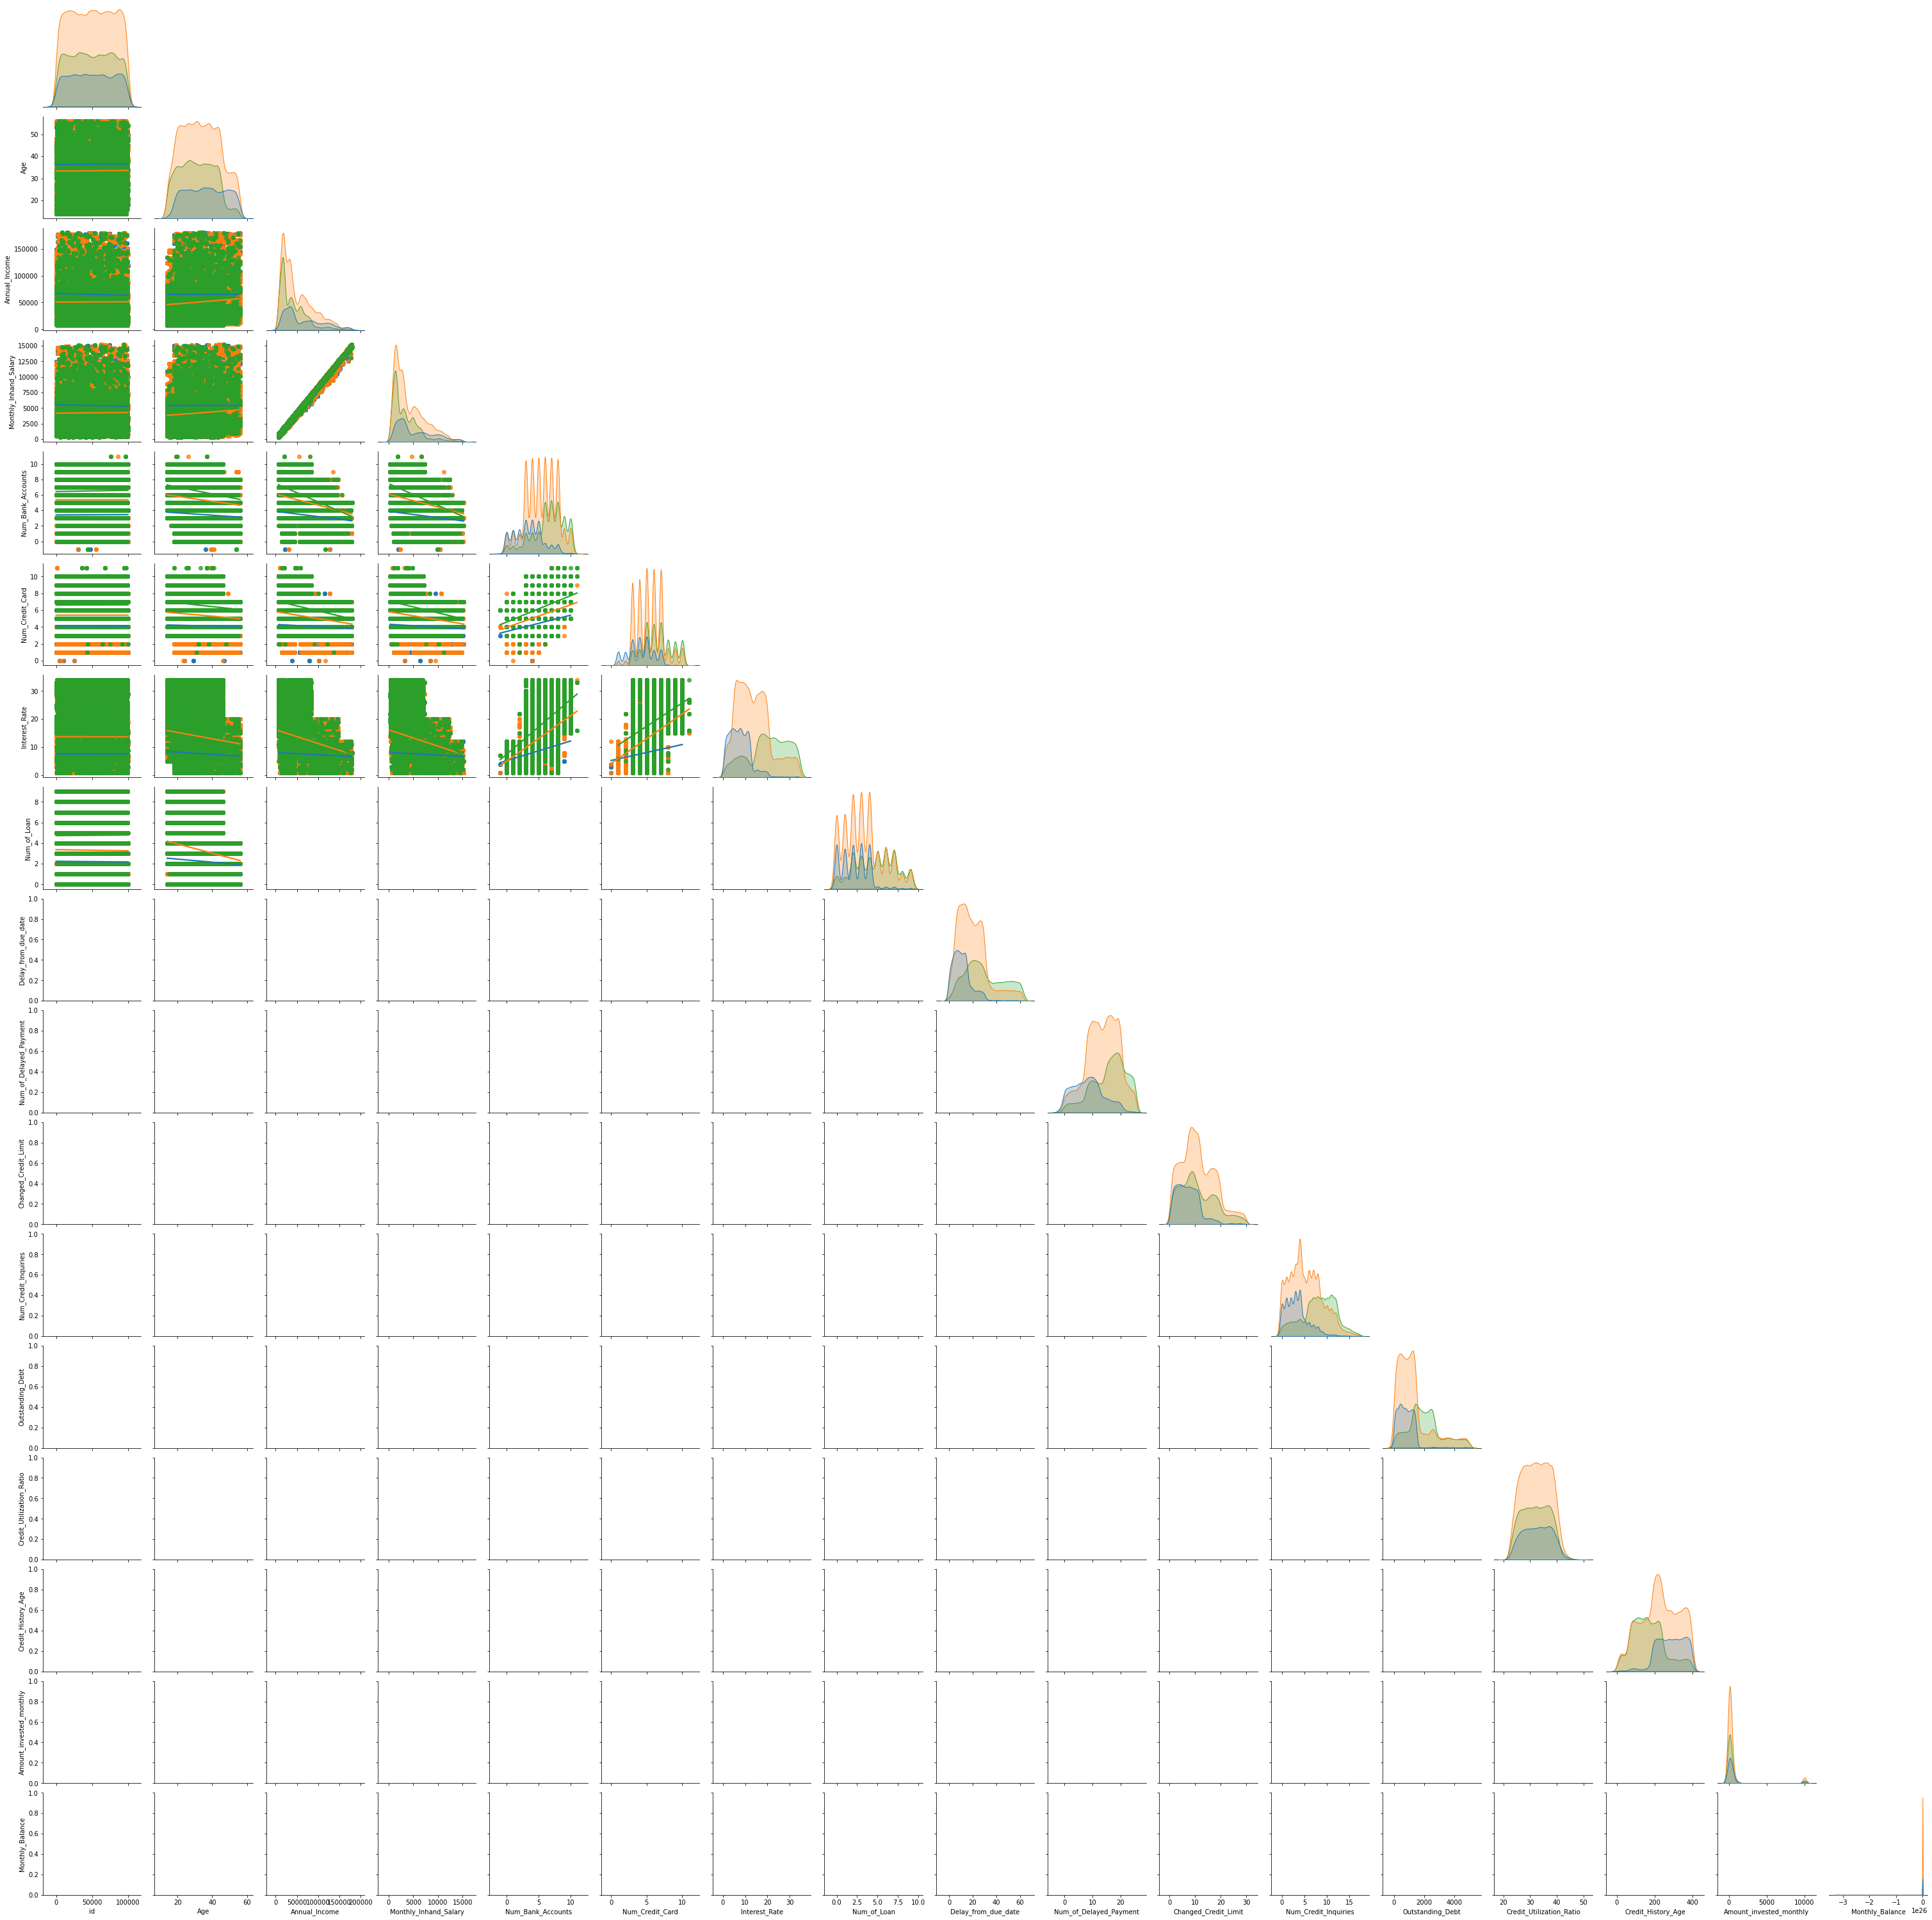

In [12]:
sns.pairplot(ds, hue='Credit_Score', corner=True, kind='reg')

In [8]:
#pre-process
#we can eliminate a priori some columns, as we can consider them as not relevant 
ds = ds.drop(columns=['Occupation', 'Type_of_Loan', 'Credit_History_Age', 'Changed_Credit_Limit', 'Payment_of_Min_Amount'])
#impute missing values
ds = ds.replace(np.nan,00)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  int64  
 1   Age                       100000 non-null  float64
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    100000 non-null  float64
 10  Num_Credit_Inquiries      100000 non-null  float64
 11  Credit_Mix                100000 non-null  int64  
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

In order to see the popularity of age

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


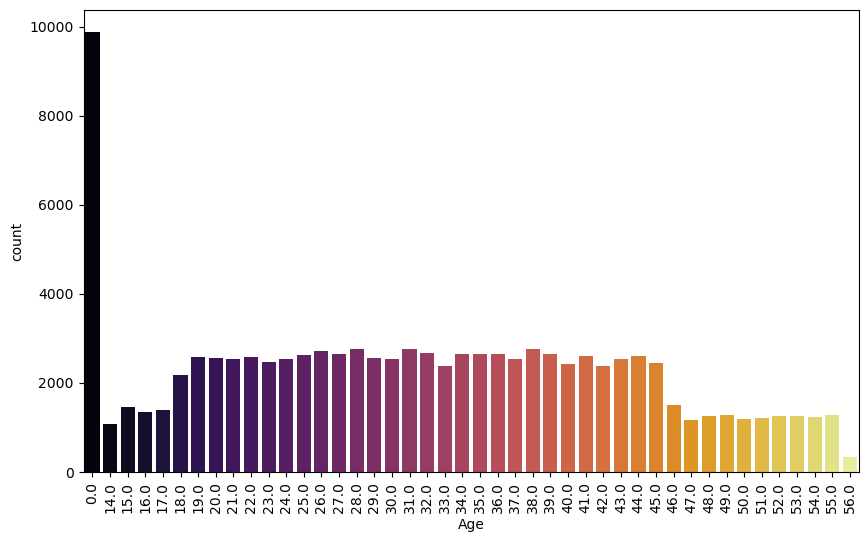

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(ds['Age'], palette='inferno')
plt.xticks(rotation=90);

Remove outliers

Outliers are points that are noticebly different from the others, this is why it is better to remove them.
We have decided to visualize them thanks to the boxplot, realized thanks to seaborn.

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

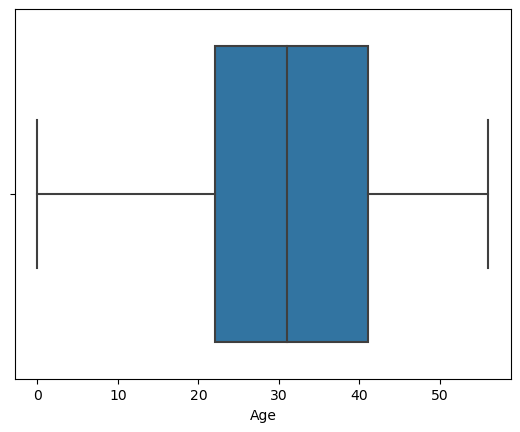

In [10]:
sns.boxplot(ds['Age'])

start the splitting

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

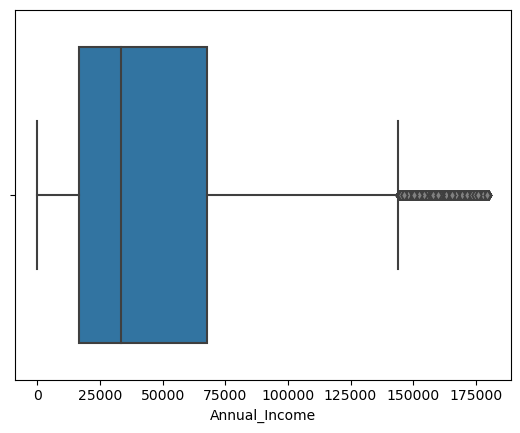

In [11]:
sns.boxplot(ds['Annual_Income'], flierprops = dict(markerfacecolor = '0.50', markersize = 5)) #in order to better visualize them

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

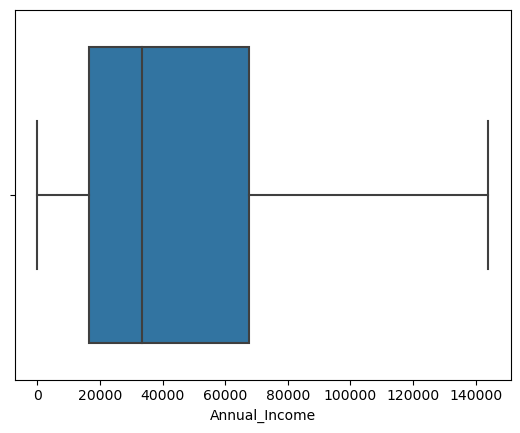

In [12]:
sns.boxplot(ds['Annual_Income'], showfliers = False) #remove outliers

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

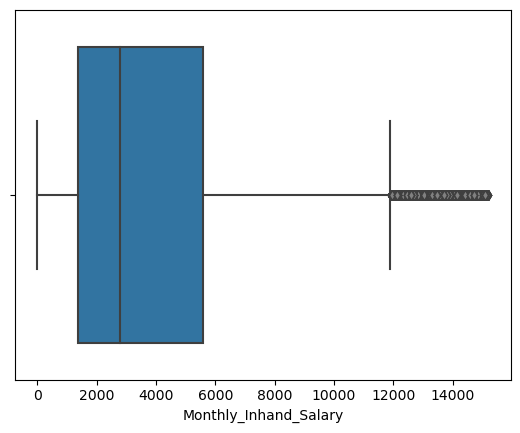

In [13]:
sns.boxplot(ds['Monthly_Inhand_Salary'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

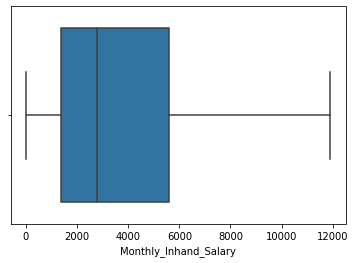

In [19]:
sns.boxplot(ds['Monthly_Inhand_Salary'],showfliers = False)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Bank_Accounts'>

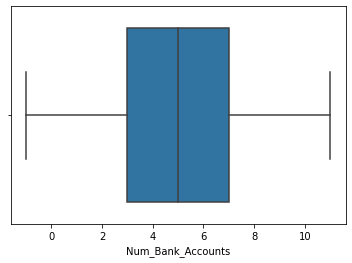

In [22]:
sns.boxplot(ds['Num_Bank_Accounts'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Bank_Accounts'>

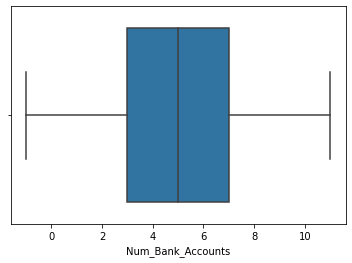

In [24]:
sns.boxplot(ds['Num_Bank_Accounts'], showfliers = False)

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Card'>

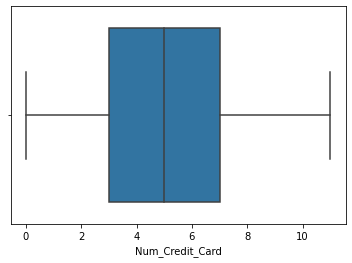

In [23]:
sns.boxplot(ds['Num_Credit_Card'], flierprops = dict(markerfacecolor = '0.50', markersize = 5)) 

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest_Rate'>

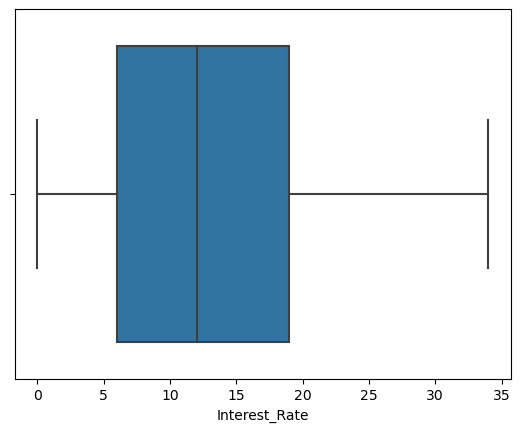

In [13]:
sns.boxplot(ds['Interest_Rate'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Loan'>

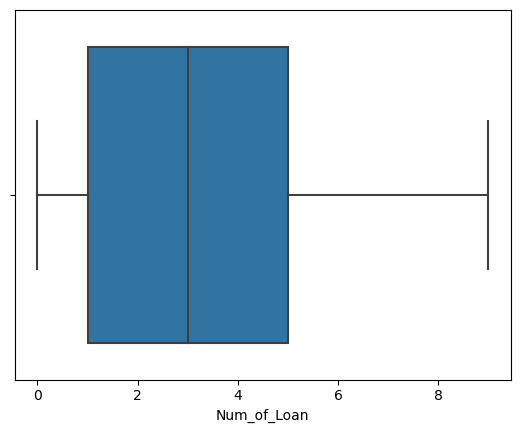

In [14]:
sns.boxplot(ds['Num_of_Loan'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delay_from_due_date'>

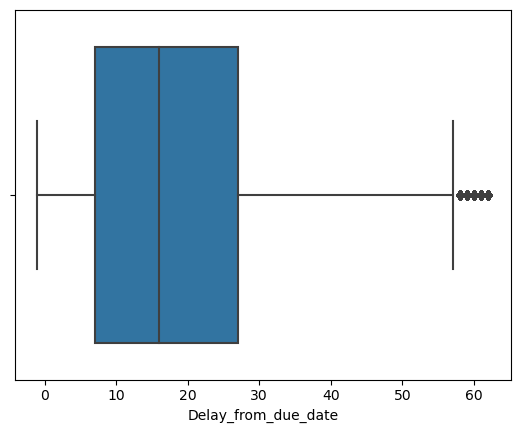

In [15]:
sns.boxplot(ds['Delay_from_due_date'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

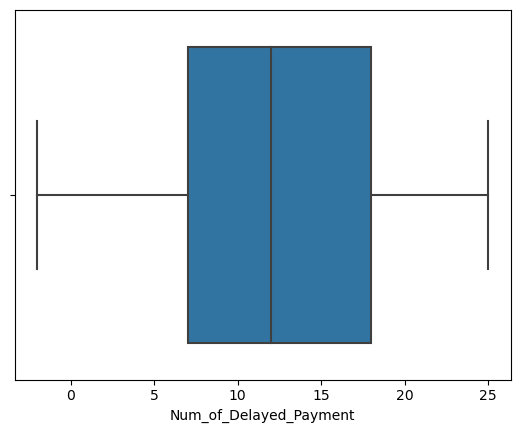

In [16]:
sns.boxplot(ds['Num_of_Delayed_Payment'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_Credit_Inquiries'>

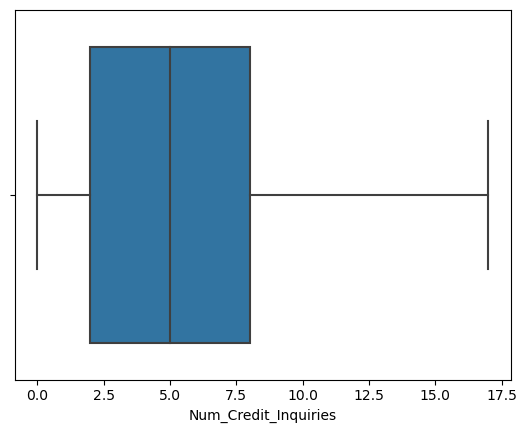

In [17]:
sns.boxplot(ds['Num_Credit_Inquiries'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))



c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Mix'>

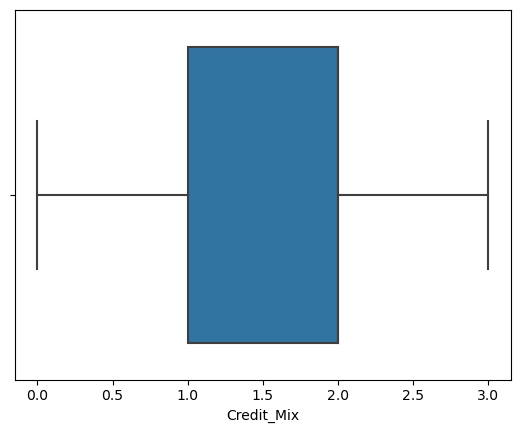

In [18]:
sns.boxplot(ds['Credit_Mix'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outstanding_Debt'>

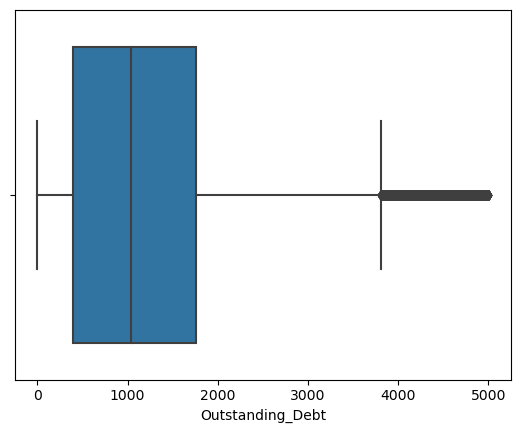

In [19]:
sns.boxplot(ds['Outstanding_Debt'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


In [ ]:
sns.boxplot(ds['Outstanding_Debt'],showfliers = False)

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Utilization_Ratio'>

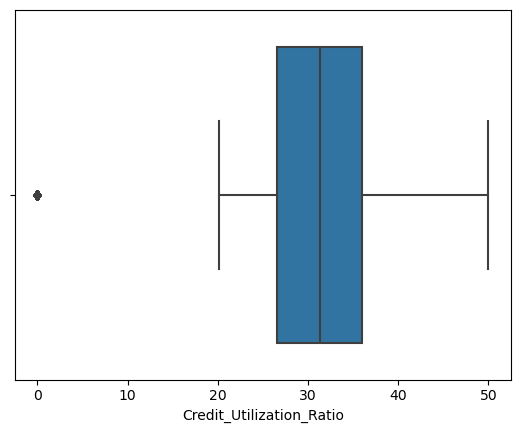

In [20]:
sns.boxplot(ds['Credit_Utilization_Ratio'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


In [ ]:
sns.boxplot(ds['Credit_Utilization_Ratio'],showfliers = False)

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount_invested_monthly'>

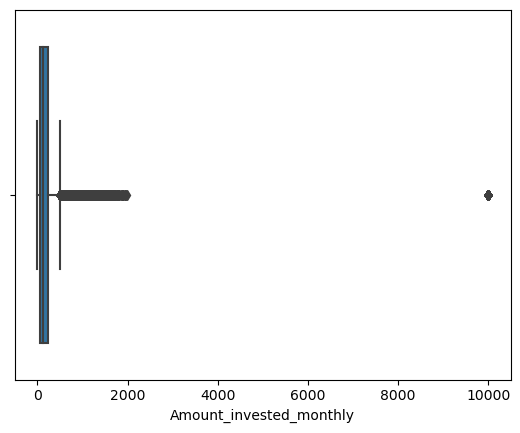

In [21]:
sns.boxplot(ds['Amount_invested_monthly'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


In [ ]:
sns.boxplot(ds['Amount_invested_monthly'], showfliers = False)

c:\Users\alber\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment_Behaviour'>

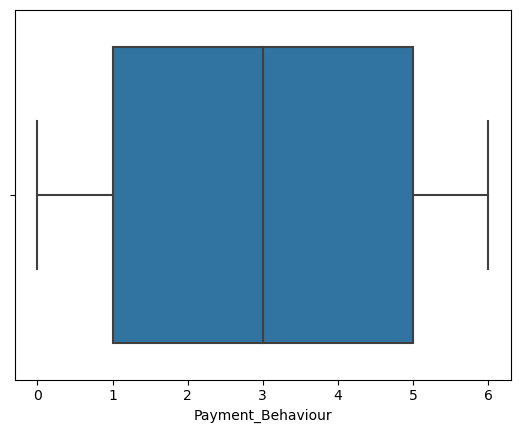

In [22]:
sns.boxplot(ds['Payment_Behaviour'], flierprops = dict(markerfacecolor = '0.50', markersize = 5))


In [ ]:
sns.boxplot(ds['Payment_Behaviour'], showfliers = False)

After having looked at our dataset and having cleaned it, we can now start collecting data into array of dependent (what we want to predict) and independent variables  

In [14]:
#collect data into arrays
X = ds.iloc[:, :-1].values      #independent variable
y = ds.iloc[:, -1].values       #dependent variable

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#encode data. This step is really important, we have already transformed the categorical data into integers. REMEMBER, NEVER TRAIN ON THE TEST SET!!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We can now decide three models that can help us solving this problem. 

In [ ]:
#validation from the training
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
model = "b"

if model == "SVC":
    classifier = SVC(kernel = 'linear', random_state = 0, max_iter=1000) #as it never stopped, we can insert a max_iter
    param_grid = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1,1, 10, 100]}
    classifier = SVC()
    clf = GridSearchCV(classifier, param_grid)
    clf.fit(X_train,y_train)
elif model=="C":
    classifier = XGBClassifier(use_label_encoder=False) #using XGboost as more efficient 
else :
    k_range = list(range(5, 7))
    param_grid = dict(n_neighbors=k_range)
    knn = neighbors.KNeighborsClassifier()
    # defining parameter range
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
    # fitting the model for grid search
    grid_search=grid.fit(X_train, y_train)

In [ ]:
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print(scores)




param_grid = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[0.1,1, 10, 100]}
classifier = SVC()
clf = GridSearchCV(classifier, param_grid)
clf.fit(X_train,y_train)
y_pred = clf.best_estimator_.predict(X_test) # this contains the best trained classifier
print(classification_report(y_test, y_pred))